In [1]:
import os
data_dir = "/home/kalyan/DataSets/DogsandCats/"
train_dir = data_dir + "training_set/training_set"
test_dir = data_dir + "test_set/test_set"

print("Contents of data directory:")
print(os.listdir(data_dir))
print("Contents of training directory:")
print(os.listdir(train_dir))
print("Contents of test directory:")
print(os.listdir(test_dir))


Contents of data directory:
['training_set', 'test_set']
Contents of training directory:
['dogs', 'cats']
Contents of test directory:
['dogs', 'cats']


In [2]:
train_cat = train_dir+"/cats/"
train_dog = train_dir+"/dogs"
test_cat = test_dir+"/cats/"
test_dog = test_dir+"/dogs/"

train_cat_fnames = os.listdir(train_cat)
train_dog_fnames = os.listdir(train_dog)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.1850.jpg', 'cat.2445.jpg', 'cat.3267.jpg', 'cat.1620.jpg', 'cat.801.jpg', 'cat.3318.jpg', 'cat.2579.jpg', 'cat.3329.jpg', 'cat.2597.jpg', 'cat.3923.jpg']
['dog.1762.jpg', 'dog.1414.jpg', 'dog.1993.jpg', 'dog.1851.jpg', 'dog.139.jpg', 'dog.1599.jpg', 'dog.3999.jpg', 'dog.3157.jpg', 'dog.266.jpg', 'dog.193.jpg']


In [3]:
print("total train cat",len(os.listdir(train_cat)))
print("total train dog",len(os.listdir(train_dog)))
print("total test cat",len(os.listdir(test_cat)))
print("total test dog",len(os.listdir(test_dog)))


total train cat 4000
total train dog 4000
total test cat 1000
total test dog 1000


(453, 499, 3)
(308, 400, 3)
(357, 361, 3)
(374, 500, 3)
(359, 306, 3)
(412, 499, 3)
(375, 499, 3)
(375, 499, 3)
(268, 360, 3)
(300, 359, 3)
(288, 383, 3)
(375, 499, 3)
(352, 473, 3)
(375, 499, 3)
(389, 400, 3)
(374, 500, 3)


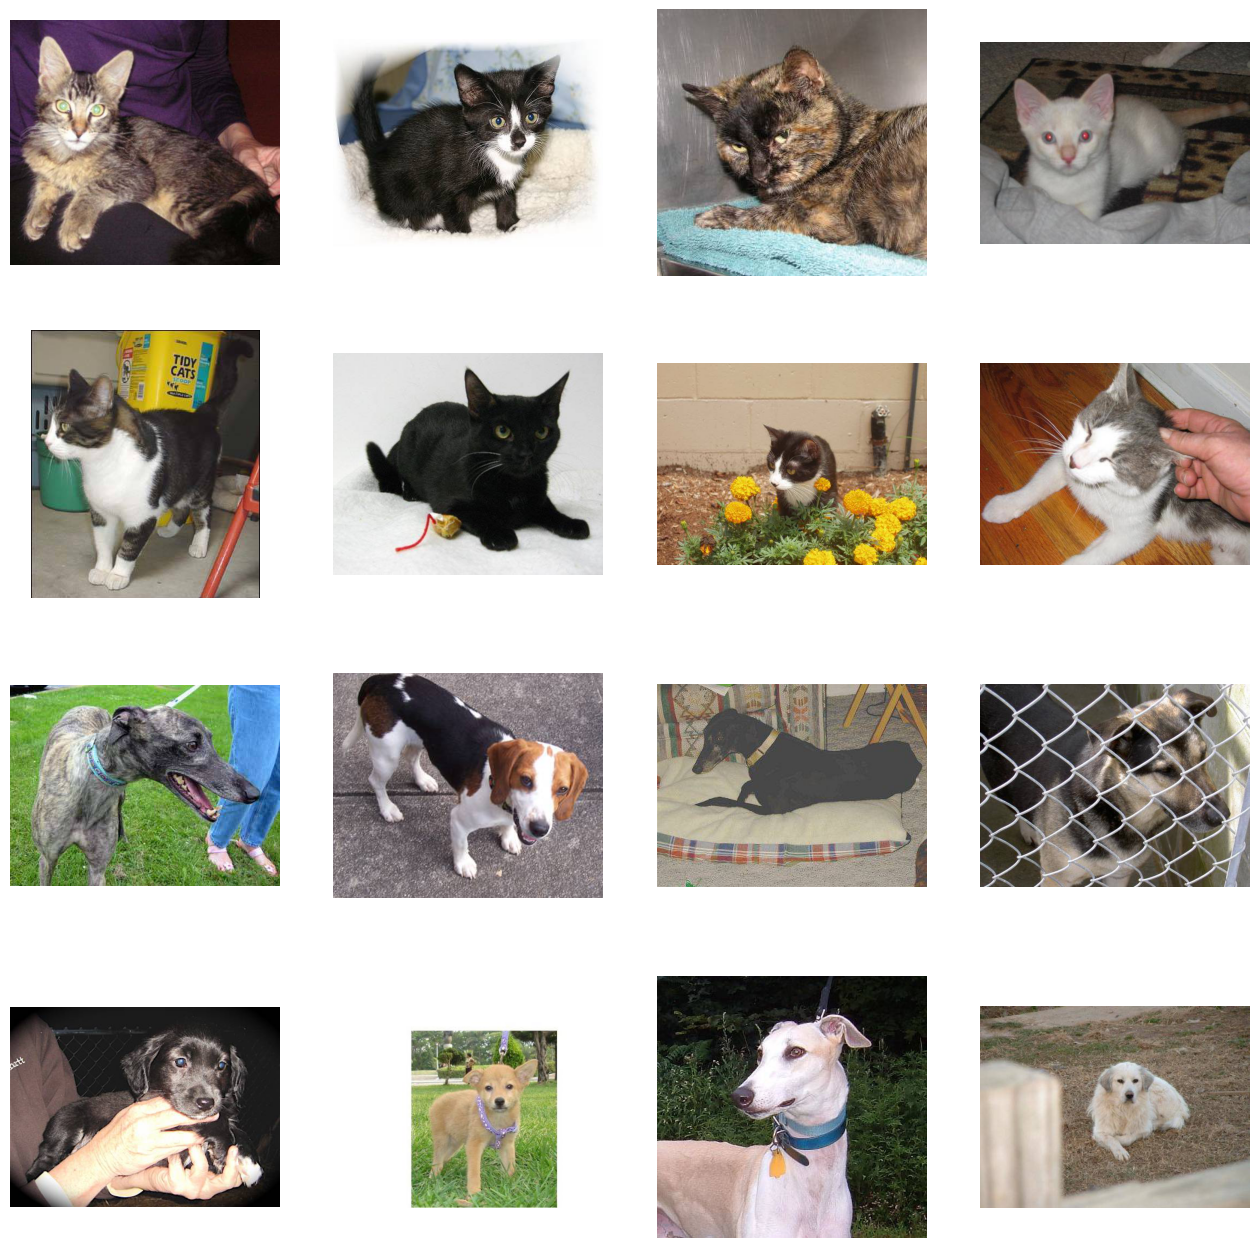

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index =0

fig = plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

next_cat_pic = [os.path.join(train_cat,fname) for fname in train_cat_fnames[pic_index:pic_index+8]]
next_dog_pic = [os.path.join(train_dog,fname) for fname in train_dog_fnames[pic_index:pic_index+8]]

for i,img_path in enumerate(next_cat_pic+next_dog_pic):
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis("off")
    img = mpimg.imread(img_path)
    plt.imshow(img)
    print(img.shape)

In [49]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [50]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 17, 17, 64)     

In [51]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=  1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip = True,
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 8,
    target_size = (150,150)
)
val_generator = train_datagen.flow_from_directory(
    test_dir,
    batch_size = 8,
    target_size = (150,150)
)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [53]:
history = model.fit(
    train_generator,
    epochs= 2,
    validation_data=val_generator,
    verbose=2
)

Epoch 1/2
1000/1000 - 69s - loss: 0.6958 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - 69s/epoch - 69ms/step
Epoch 2/2
1000/1000 - 68s - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - 68s/epoch - 68ms/step


Data_Augumentation is not working here